<a href="https://colab.research.google.com/github/ardilalukita14/Magang-Kominfo/blob/main/Mining_Merge_Keyword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Library yang Dibutuhkan**

In [1]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 749 kB 43.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [2]:
!pip install pygooglenews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 362 kB 10.4 MB/s 
     |████████████████████████████████| 1.2 MB 53.5 MB/s 
     |████████████████████████████████| 128 kB 45.2 MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-py3-none-any.whl size=44952 sha256=24726add45793cf1d9a7885e3d0aa5859828847aad78213cb544976116442ec1
  Stored in directory: /root/.cache/pip/wheels/29/bf/46/b4a597d435d3aee6c2fa583824897336d65abf13ebe3405b70
Successfully built feedparser
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: dateparser
    Found existing installation: dateparser 1.1.1
    Uninstalling dateparser-1.1.1:
      Successfully uninstalled dateparser-1.1.1
  Attempting uninstall: beautifulsoup4
    Fo

In [3]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [4]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 5.1 MB/s 
     |████████████████████████████████| 7.4 MB 17.8 MB/s 
     |████████████████████████████████| 93 kB 1.6 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=df373f12b6c36cb01c04e1ebf3f37187d1e6c8bca69ef9a5b6d097157863b164
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=323d3c01399e5b4767eb6d008c2d67e41c9d781e681729b37dc950eb7e03ce88
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=75e4cf8d6cda3e21ad7c8753b36d8d2f0b869a7848decf269366cde33991f32b
  Stored in directory: /root/.cache/pip/

In [5]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Proses Scraping, Stemming, Stop Words Google News**

In [6]:
# import library 
from pygooglenews import GoogleNews
import csv
from newspaper import Article
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('punkt')
from pprint import pprint
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import pandas as pd
from time import sleep
#from google.colab import files


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
f = open("stop words.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [14]:
dateawal = input("Tanggal start : ")
year, month, day = map(int, dateawal.split('-'))
dateakhir = input("Tanggal end : ")
year2, month2, day2 = map(int, dateakhir.split('-'))

Tanggal start : 2022-07-01
Tanggal end : 2022-07-27


In [15]:

# Scrapping Function to get google news (title, link)
gn = GoogleNews(lang = 'id',country = 'ID') 
def get_titles(search):
    stories = []

    # setting tanggal
    start_date = datetime.date(year, month, day)
    end_date = datetime.date(year2, month2, day2)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'), when = '1d')
        newsitem = result['entries']
   # stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    for item in newsitem:
        url=item.link
        try:
            article = Article(url)
            article.download()
            article.parse()
            story = {
                'Title' : item.title,
                'Read more' : item.link,
                'Time' : item.published,
                'Article' : article.title,
                'Stemming' : stemmer.stem(article.title),
                'WordTokens' :(word_tokenize(stemmer.stem(article.title))),
                'WordsStop' : [w for w in (word_tokenize(stemmer.stem(article.title))) if not w in stopword_list ],
                'TotalKata' : len([w for w in (word_tokenize(stemmer.stem(article.title))) if not w in stopword_list ])
                }
            if article.title=="Are you a robot?" or article.title=="Subscribe to read" :
                continue
            else:
                stories.append(story)
                i=i+1
                print(i,'',article.title)
                sleep(1)
        except:
              pass
        stories.append(story)
        sleep(0)
    return stories


In [16]:
# Process Summarize Goolge News Article + Sentiment Analysis of Google News
def summarize_artcle(url):
    article = Article(url)
    # Set up 
    article.download()
    article.parse()
    # Download Punkt
    article.download('punkt')
    article.nlp()
    summary = article.summary

    analysis = TextBlob(article.text)
    sentiment_a =""
    if analysis.polarity > 0:
      sentiment_a="positif"
    elif analysis.polarity < 0:
      sentiment_a="negatif"
    else:
       sentiment_a="netral"

    return summary,sentiment_a

In [17]:
#Function to save a list
def save_dict(topic, number):
    try: 
      dcts = get_titles(topic)
      news_list = []
      for x in range(number):
        dctss = dcts[x]
        url = dctss['Read more']
        try:
          summary_analysis = list(summarize_artcle(url))
          dctss['Sentiment'] = summary_analysis[1]
          dctss['Summary'] = summary_analysis[0]
        except:
          dctss['Sentiment'] = 'error'
          dctss['Summary'] ='error'
        news_list.append(dctss)
        pprint(dctss)
      return news_list 
    except:
        print('Please input useable topics, thanks or check this -> https://github.com/kotartemiy/pygooglenews#installation')

In [27]:
#Function to Save a CSV file
def save_to_csv(news_list):
    labels = ['Time', 'Title', 'Read more','Sentiment','Summary', 'Article', 'Stemming', 'WordTokens', 'WordsStop', 'TotalKata']
    try:
        with open(file, 'w') as f:
            writer = csv.DictWriter(f, fieldnames=labels)
            writer.writeheader()
            for elem in news_list:
                writer.writerow(elem)
        print("Download csv Sucessfully")
    except IOError:
        print("I/O error")
file = input('Rename file: ')

Rename file: kotamadiun.csv


In [28]:
# Let's run this    
print("Hi, there!")
topic = input('Now Enter your topics to Search or Exit: ')
while topic != 'Exit':
  number = int(input('How many articles you want to search (up to 100)? '))
  news_data = save_dict(topic, number)
  try:
    save_to_csv(news_data)
    #save_to_csv2(news_data)
  except:
    print("Retry it again!")
  topic = input('Now Enter Your Topics to Search or Exit: ')
print('See you, hope you have a great day! ❤️')

Hi, there!
Now Enter your topics to Search or Exit: madiun
How many articles you want to search (up to 100)? 5
{'Article': 'Rapat Persiapan Satu Suro, Wali Kota : Pendekar Di Kota Madiun '
            'Harus Jadi Contoh Yang Baik',
 'Read more': 'https://madiuntoday.id/2022/07/26/rapat-persiapan-satu-suro-wali-kota-pendekar-di-kota-madiun-harus-jadi-contoh-yang-baik/',
 'Sentiment': 'netral',
 'Stemming': 'rapat siap satu suro wali kota pendekar di kota madiun harus '
             'jadi contoh yang baik',
 'Summary': 'MADIUN – Menjelang peringatan 1 Suro tahun ini, Pemerintah Kota '
            'Madiun bersama Forkopimda di wilayah kota/kabupaten Madiun Raya '
            'menggelar rapat koordinasi.\n'
            'Khususnya, di Kota Madiun.\n'
            '“Pendekar Kota Madiun harus jadi contoh.\n'
            'Kota Madiun sebagai satu-satunya kota di wilayah Madiun Raya '
            'telah menjadi penyangga bagi daerah sekitar.\n'
            'Serta, tidak dinodai dengan satu peri

## **Join Dataset**

In [29]:
d1 = pd.read_csv(input('masukkan nama file 1 : '))
d2 = pd.read_csv(input('masukkan nama file 2 : '))
d3 = pd.read_csv(input('masukkan nama file 3 : '))
d4 = pd.read_csv(input('masukkan nama file 4 : '))
d5 = pd.read_csv(input('masukkan nama file 5 : '))
frames = [d1, d2, d3, d4, d5] 
result = pd.concat(frames).drop_duplicates().reset_index(drop=True)

masukkan nama file 1 : kotamadiun.csv
masukkan nama file 2 : madiun.csv
masukkan nama file 3 : kotapendekar.csv
masukkan nama file 4 : kotagadis.csv
masukkan nama file 5 : walikota.csv


In [30]:
result.to_csv(r'join.csv', index=False)

In [31]:
df2 = input("Upload file CSV: ")
df3 = pd.read_csv(df2)
df3

Upload file CSV: join.csv


,Time,Title,Read more,Sentiment,Summary,Article,Stemming,WordTokens,WordsStop,TotalKata
0,"Tue, 26 Jul 2022 13:13:53 GMT","Rapat Persiapan Satu Suro, Wali Kota : Pendeka...",https://madiuntoday.id/2022/07/26/rapat-persia...,netral,MADIUN – Menjelang peringatan 1 Suro tahun ini...,"Rapat Persiapan Satu Suro, Wali Kota : Pendeka...",rapat siap satu suro wali kota pendekar di kot...,"['rapat', 'siap', 'satu', 'suro', 'wali', 'kot...","['rapat', 'suro', 'wali', 'kota', 'pendekar', ...",8
1,"Tue, 26 Jul 2022 06:30:20 GMT","Kunjungi Stan Pameran Kota Madiun di JKF Batu,...",https://madiuntoday.id/2022/07/26/kunjungi-sta...,positif,MADIUN – Stan pameran Pemerintah Kota Madiun d...,"Kunjungi Stan Pameran Kota Madiun di JKF Batu,...",kunjung stan pamer kota madiun di jkf batu gub...,"['kunjung', 'stan', 'pamer', 'kota', 'madiun',...","['kunjung', 'stan', 'pamer', 'kota', 'madiun',...",11
2,"Tue, 26 Jul 2022 06:30:20 GMT","Terus Menimba Ilmu, Sembilan Serdik Polri Gela...",https://madiuntoday.id/2022/07/26/terus-menimb...,netral,Maka dari itu Polri sebagai pengayom masyaraka...,"Terus Menimba Ilmu, Sembilan Serdik Polri Gela...",terus timba ilmu sembilan serdik polri gelar k...,"['terus', 'timba', 'ilmu', 'sembilan', 'serdik...","['timba', 'ilmu', 'sembilan', 'serdik', 'polri...",10
3,"Tue, 26 Jul 2022 17:02:00 GMT",Tegas! Wali Kota Madiun Larang Konvoi Kendaraa...,https://www.solopos.com/tegas-wali-kota-madiun...,netral,"SOLOPOS.COM - Wali Kota Madiun, Maidi, saat me...",Tegas! Wali Kota Madiun Larang Konvoi Kendaraa...,tegas wali kota madiun larang konvoi kendara s...,"['tegas', 'wali', 'kota', 'madiun', 'larang', ...","['wali', 'kota', 'madiun', 'larang', 'konvoi',...",8
4,"Tue, 26 Jul 2022 13:11:11 GMT","Ajang Kreasi dan Cetak Prestasi, Pramuka Kwarc...",https://madiuntoday.id/2022/07/26/ajang-kreasi...,netral,MADIUN – Gerakan Pramuka Kwartir Cabang (Kwarc...,"Ajang Kreasi dan Cetak Prestasi, Pramuka Kwarc...",ajang kreasi dan cetak prestasi pramuka kwarca...,"['ajang', 'kreasi', 'dan', 'cetak', 'prestasi'...","['ajang', 'kreasi', 'cetak', 'prestasi', 'pram...",12
5,"Tue, 26 Jul 2022 02:27:50 GMT","Wow, Jumlah Pendekar PSHT Jawa Tengah Tembus 5...",https://joglosemarnews.com/2022/07/wow-jumlah-...,netral,"SRAGEN, JOGLOSEMARNEWS.COM – Memasuki usia sat...","Wow, Jumlah Pendekar PSHT Jawa Tengah Tembus 5...",wow jumlah pendekar psht jawa tengah tembus 5 ...,"['wow', 'jumlah', 'pendekar', 'psht', 'jawa', ...","['wow', 'pendekar', 'psht', 'jawa', 'tembus', ...",10
6,"Tue, 26 Jul 2022 14:22:47 GMT",Pria Asal Lowokwaru Kota Malang Cabuli Tetangg...,https://suryamalang.tribunnews.com/2022/07/26/...,netral,SURYAMALANG.COM|MALANG - Kejaksaan Negeri (Kej...,Pria Asal Lowokwaru Kota Malang Cabuli Tetangg...,pria asal lowokwaru kota malang cabul tetangga...,"['pria', 'asal', 'lowokwaru', 'kota', 'malang'...","['pria', 'lowokwaru', 'kota', 'malang', 'cabul...",11
7,"Tue, 26 Jul 2022 13:15:04 GMT",Pemerkosa Penyandang Tunarungu di Kota Proboli...,https://www.detik.com/jatim/hukum-dan-kriminal...,netral,Pelaku pemerkosaan perempuan penyandang tunawi...,Pemerkosa Penyandang Tunarungu di Kota Proboli...,perkosa sandang tunarungu di kota probolinggo ...,"['perkosa', 'sandang', 'tunarungu', 'di', 'kot...","['perkosa', 'sandang', 'tunarungu', 'kota', 'p...",6
8,"Tue, 26 Jul 2022 12:59:00 GMT","Buron 3 Bulan, Pria Cabuli 2 Gadis di Baubau D...",https://sulsel.inews.id/berita/buron-3-bulan-p...,netral,"BAUBAU, iNews.id - Pelarian IF pelaku pencabul...","Buron 3 Bulan, Pria Cabuli 2 Gadis di Baubau D...",buron 3 bulan pria cabul 2 gadis di baubau tan...,"['buron', '3', 'bulan', 'pria', 'cabul', '2', ...","['buron', '3', 'pria', 'cabul', '2', 'gadis', ...",9
9,"Tue, 26 Jul 2022 11:38:00 GMT","Peringatan 1 Suro, Wali Kota Maidi Larang Para...",https://www.koranmemo.com/daerah/pr-1923981237...,negatif,"Hal itu ditegaskan Wali Kota Madiun, Maidi saa...","Peringatan 1 Suro, Wali Kota Maidi Larang Para...",ingat 1 suro wali kota maidi larang para silat...,"['in

Masukkan file: join.csv


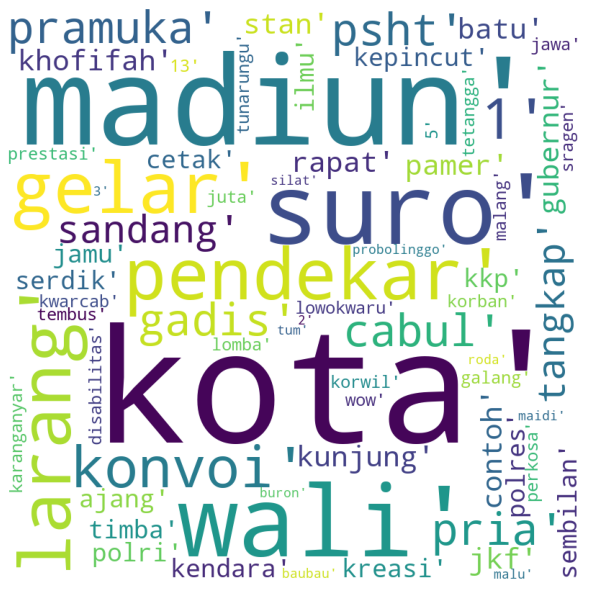

In [32]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv((input('Masukkan file: ')), encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.WordsStop:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()